#Comprensión de datos:

Descripción del Dataset

Nombre: Bank Marketing Dataset (bank-full.csv)

Fuente: UCI Machine Learning Repository

Dominio: Marketing bancario

Tamaño: 45,211 observaciones y 17 variables

Tipo de problema: Clasificación binaria

Este dataset contiene información de campañas de marketing directo realizadas por teléfono por un banco en Portugal. El objetivo es predecir si un cliente aceptará suscribir un depósito a plazo, representado por la variable objetivo _y_ (Donde sus valores se tomara de manera binaria (Value: “yes” / “no”) ).

Repo de trabajo: https://github.com/jcugarriza/ia-grupo-4-pf



##Variables Principales

|Variable|Descripción|Tipo|
|-|-|-|
|age|Edad|Numérica|
|job|Ocupación|Categórica|
|marital|Estado civil|Categórica|
|education|Nivel educativo|Ordinal|
|default|Crédito en mora|Categórica|
|balance|	Saldo promedio anual|Numérica|
|housing|¿Tiene hipoteca?|Categórica|
|loan|¿Tiene préstamo personal?|Categórica|
|contact|Canal de contacto|Categórica|
|day|Día del último contacto|Numérica|
|month|	Mes del contacto	Categórica|temporal|
|duration|Duración de la llamada (segundos)|Numérica|
|campaign|# de contactos en la campaña|Numérica|
|pdays|	Días desde contacto previo|Numérica|
|previous|# de contactos previos|Numérica|
|poutcome|Resultado de campaña previa|Categórica|
|y|Suscribió depósito a plazo|Categórica → Objetivo|

###Hipotesis de predición:
Nuestro objectivo es predecir si un cliente aceptará subcribir un deposito a largo plazo
 después de ser contactado por la campaña telefonica del banco. Esto es importante porque permite al (los) banco(s) identificar qué clientes tienen una mayor probabilidad de aceptar la oferta, optimizando así sus recursos de marketing, reduciendo costos operativos y aumentando la efectividad de las campañas.

Nuestra hipotesis es si:

* La probabilidad de que un cliente acepte un depósito a plazo depende de sus características personales, su situación financiera y el historial de interacciones previas con el banco.
En particular donde el cliente presenta:
- Una mayor duración de llamada
- Un saldo bancario más alto
- Un punto de contacto exitosos previo
Esta asociado con una mayor probabilidad de respuesta positiva, es decir y="Yes"


##EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


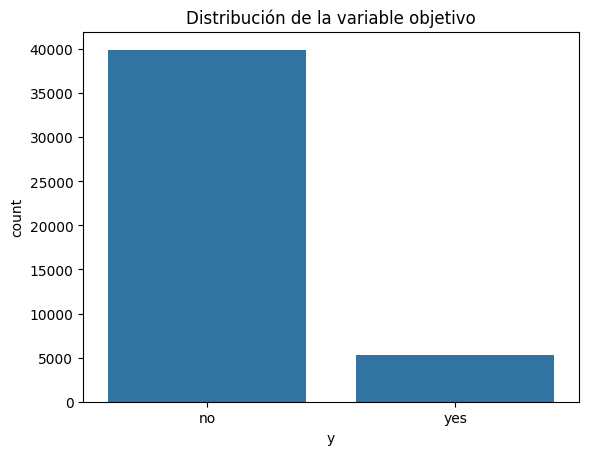

,proportion
y,
no,0.883015
yes,0.116985


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("bank-full.csv", sep=';') # necesitamos cargar el dataset XD
#identificando valores faltantes

#Información general del dataset:
#Buscamos identificar las cantidad de filas y columna, los tipos de datos, verificar los "valores faltantes" y ver la distribucion general
df.head()
df.info()
df.describe(include='all')

#Valores faltantes
df.isnull().sum() # Creo que el dataset no contiene valores faltantes explícitos, pero parece que existen categorías como "unknown" que deben ser tratadas como datos faltantes implícitos.

# Distribución de la variable objectivo

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df)
plt.title("Distribución de la variable objetivo")
plt.show()

df['y'].value_counts(normalize=True)

Según los datos anteriores se puede interpretar que el dataset está desbalancado, debido que la mayorias de las respuesta (en "y") son "no", aún así la cantida de datos donde la variable objectiva es "si" es suficiente para entrenar un modelo predictivo.
Este desbalance se consideró normal debido a la naturaleza de la variable objectivo: "predecir si un cliente aceptará subcribir un deposito a largo plazo"


---

In [ ]:
df.apply(lambda col: col[col == "unknown"].count()) # saber cuantas columna tiene el valor "unknown"

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


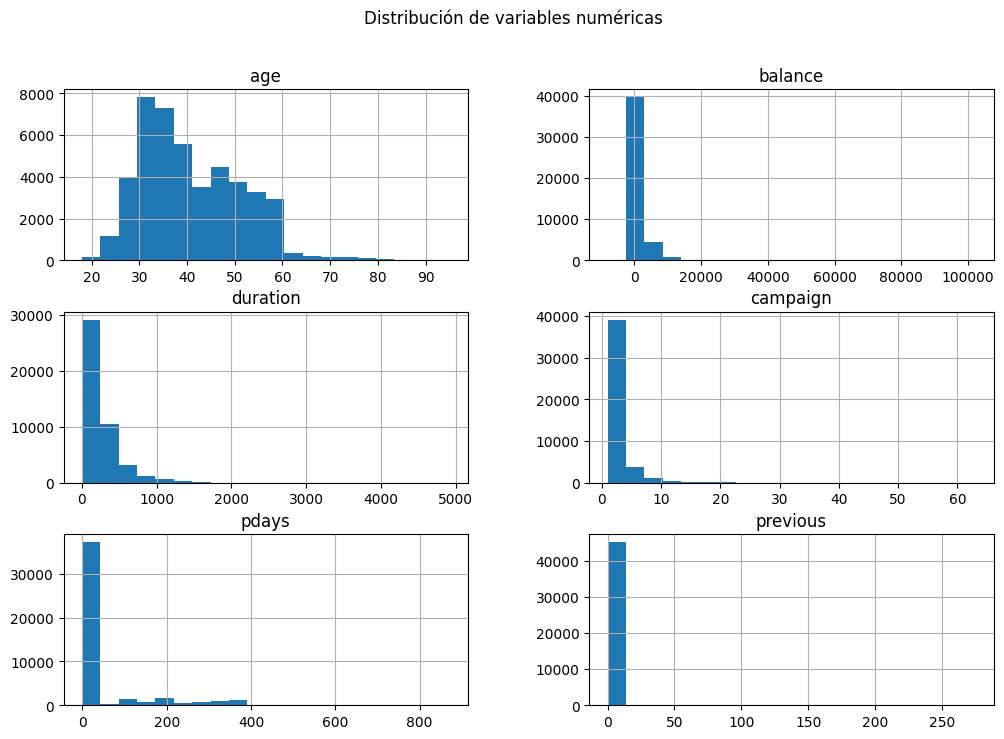

In [ ]:

#Distribución de variables numéricas
df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribución de variables numéricas")
plt.show()

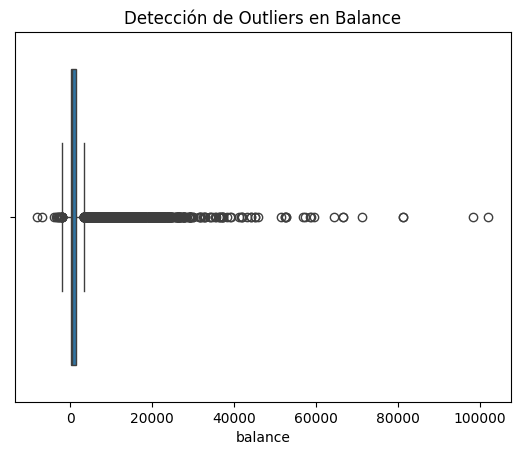

In [ ]:
sns.boxplot(data=df, x=df['balance'])
plt.title("Detección de Outliers en Balance")
plt.show()

## Correlacion

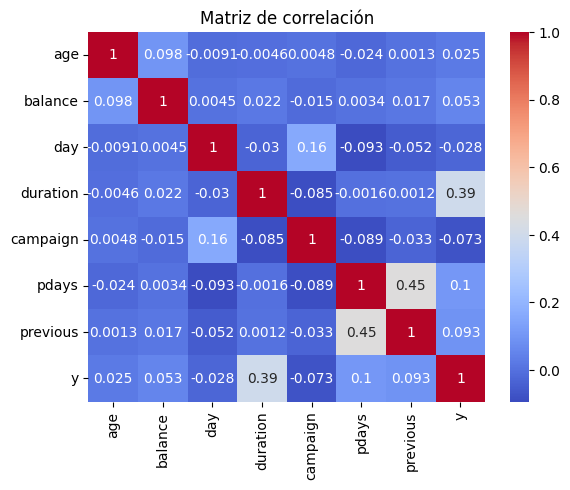

In [ ]:
df_corr = df.copy()
df_corr['y'] = df_corr['y'].map({'yes': 1, 'no': 0})
corr = df_corr.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

## Chi-Square

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

df_cat = df.select_dtypes(include=['object']).copy()
for col in df_cat.columns:
    df_cat[col] = LabelEncoder().fit_transform(df_cat[col])

chi_scores, p_values = chi2(df_cat.drop('y', axis=1), df_cat['y'])
chi_results = pd.DataFrame({'Variable': df_cat.columns.drop('y'),'Chi2': chi_scores})
chi_results.sort_values(by='Chi2', ascending=False)

,Variable,Chi2
6,contact,1253.814109
4,housing,388.949715
0,job,182.452260
5,loan,176.516137
8,poutcome,104.677479
2,education,90.617723
7,month,44.321905
1,marital,29.766067
3,default,22.313875


## Visualización de datos multivariados

Duración vs Resultado


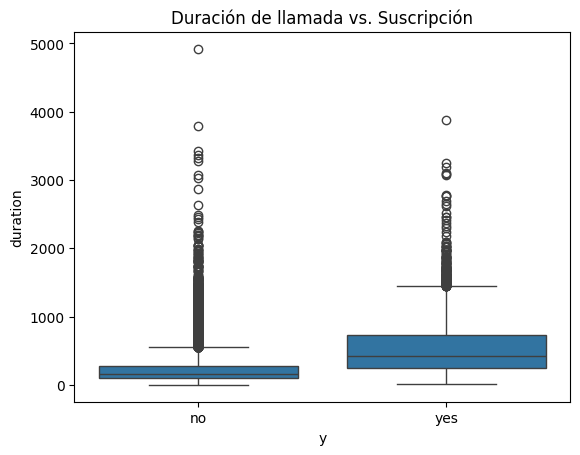

In [ ]:
sns.boxplot(x='y', y='duration', data=df)
plt.title("Duración de llamada vs. Suscripción")
plt.show()

##Balance vs Resultado

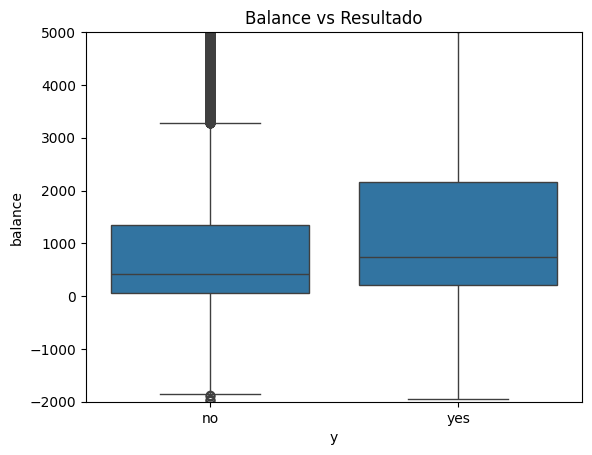

In [ ]:
sns.boxplot(x='y', y='balance', data=df)
plt.ylim(-2000, 5000) # mejorar visualización
plt.title("Balance vs Resultado")
plt.show()

##Pairplot

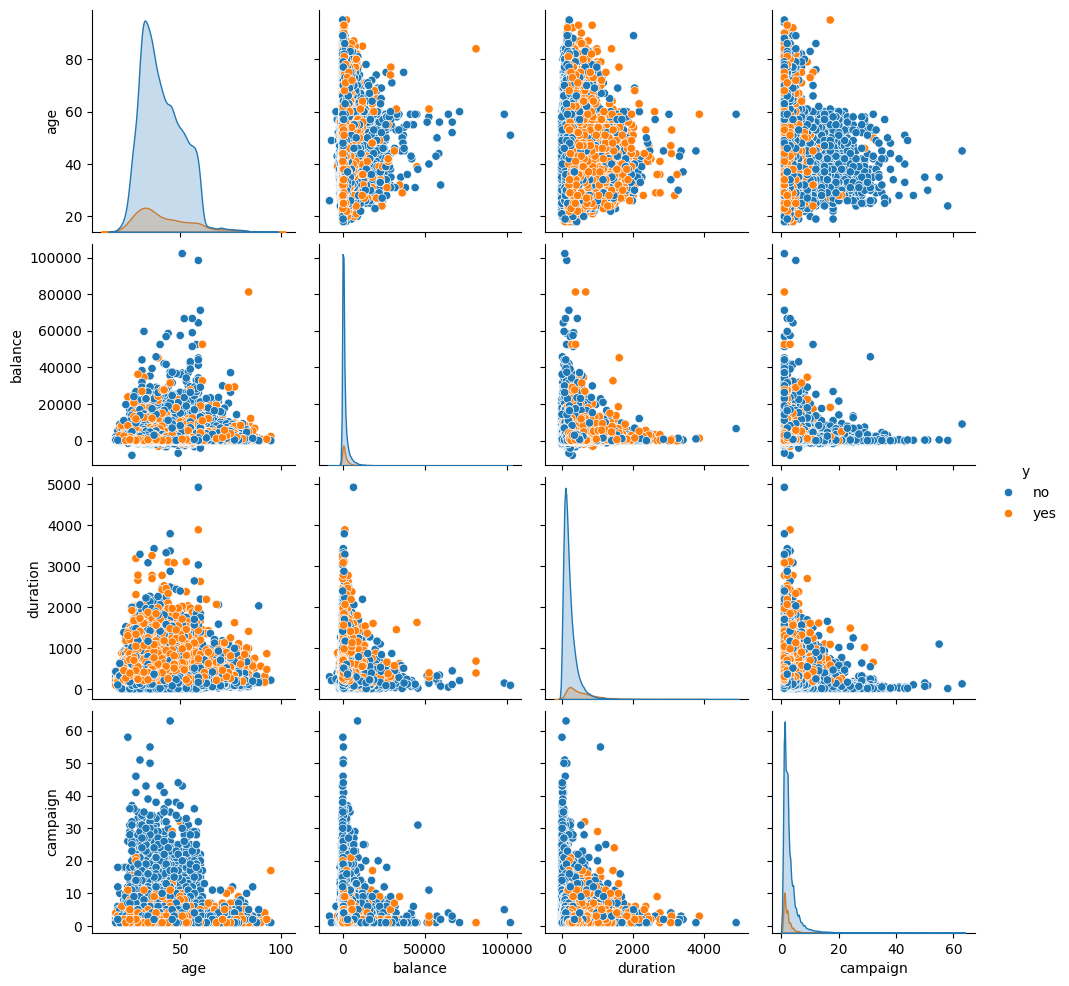

In [ ]:
sns.pairplot(df[['age','balance','duration','campaign','y']], hue='y')
plt.show()

#Preprocesamiento

## Tratamiento de datos

In [ ]:
# Parámetros
TEST_SIZE = 0.30        # 70/30
RANDOM_STATE = 42
N_COMPONENTS = 10       # número de componentes PCA (ajusta según quieras)

In [ ]:
# 2. Reemplazar 'unknown' por 'No_Registrado' en columnas categóricas
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].replace('unknown', 'No_Registrado')

In [ ]:
# 3. Eliminar 'duration' (no debe usarse porque es conocido solo después de la llamada. Esto es recomendado por la fuente para entrenar modelos)
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])
    print("Se eliminó la columna 'duration'")

Se eliminó la columna 'duration'


In [ ]:
# 4. Separar variable objetivo 'y' y convertir a 0/1
if 'y' not in df.columns:
    raise ValueError("No se encontró la columna 'y' en el dataset")
y = df['y'].map({'no': 0, 'yes': 1})
if y.isnull().any():
    raise ValueError("La columna 'y' contiene valores distintos de 'yes'/'no'")
df = df.drop(columns=['y'])

In [ ]:
from sklearn.model_selection import train_test_split

# 5. Separar train/test ANTES del PCA utilizando estratificación para preservar la proporción de clases en la variable objetivo
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    df,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)
print("Train shape (raw):", X_train_raw.shape)
print("Test shape (raw):", X_test_raw.shape)

Train shape (raw): (31647, 17)
Test shape (raw): (13564, 17)


In [ ]:
# 6. One-hot encoding sobre las variables categóricas
X_train = pd.get_dummies(X_train_raw, drop_first=False)
X_test = pd.get_dummies(X_test_raw, drop_first=False)

# Alinear columnas de train y test (por si faltan categorías en test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print("Train shape (one-hot):", X_train.shape)
print("Test shape (one-hot):", X_test.shape)

Train shape (one-hot): (31647, 52)
Test shape (one-hot): (13564, 52)


In [ ]:
from sklearn.preprocessing import StandardScaler

# 7. Estandarizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

# 8. PCA: se entrena SOLO con X_train
# N_COMPONENTS puede ser un número o None (para conservar toda la varianza)
pca = PCA(n_components=N_COMPONENTS)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Train shape (PCA):", X_train_pca.shape)
print("Test shape (PCA):", X_test_pca.shape)


Train shape (PCA): (31647, 10)
Test shape (PCA): (13564, 10)


In [ ]:
# 9. Exportar a CSV para usar en C
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

X_train_pca_df.to_csv("X_train_pca.csv", index=False)
X_test_pca_df.to_csv("X_test_pca.csv", index=False)
y_train.to_csv("y_train.csv", index=False, header=True)
y_test.to_csv("y_test.csv", index=False, header=True)

print("Archivos exportados:")
print(" - X_train_pca.csv")
print(" - X_test_pca.csv")
print(" - y_train.csv")
print(" - y_test.csv")

Archivos exportados:
 - X_train_pca.csv
 - X_test_pca.csv
 - y_train.csv
 - y_test.csv


AQUI TERMINA EL NUEVO PREPROCESAMIENTO. EL RESTO HACIA ABAJO ES VIEJO.

In [ ]:
df = df.replace("unknown", "No_Registrado")  # Cambiar unknowns

# --- FIX GLOBAL ANTES DE TRANSFORMACIONES ---

# Convertir balance a numérico y forzar errores a NaN
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

# Reemplazar Inf y -Inf por NaN (correcto)
df['balance'] = df['balance'].replace([np.inf, -np.inf], np.nan)

# Rellenar NaN con la mediana (correcto)
df['balance'] = df['balance'].fillna(df['balance'].median())



In [ ]:
# Winsorización - recorte en percentiles
lower = df['balance'].quantile(0.01)
upper = df['balance'].quantile(0.99)
df['balance_wins'] = df['balance'].clip(lower=lower, upper=upper)


df['balance_wins'] = df['balance_wins'].clip(lower=0)

df['balance_log'] = np.log1p(df['balance_wins'])

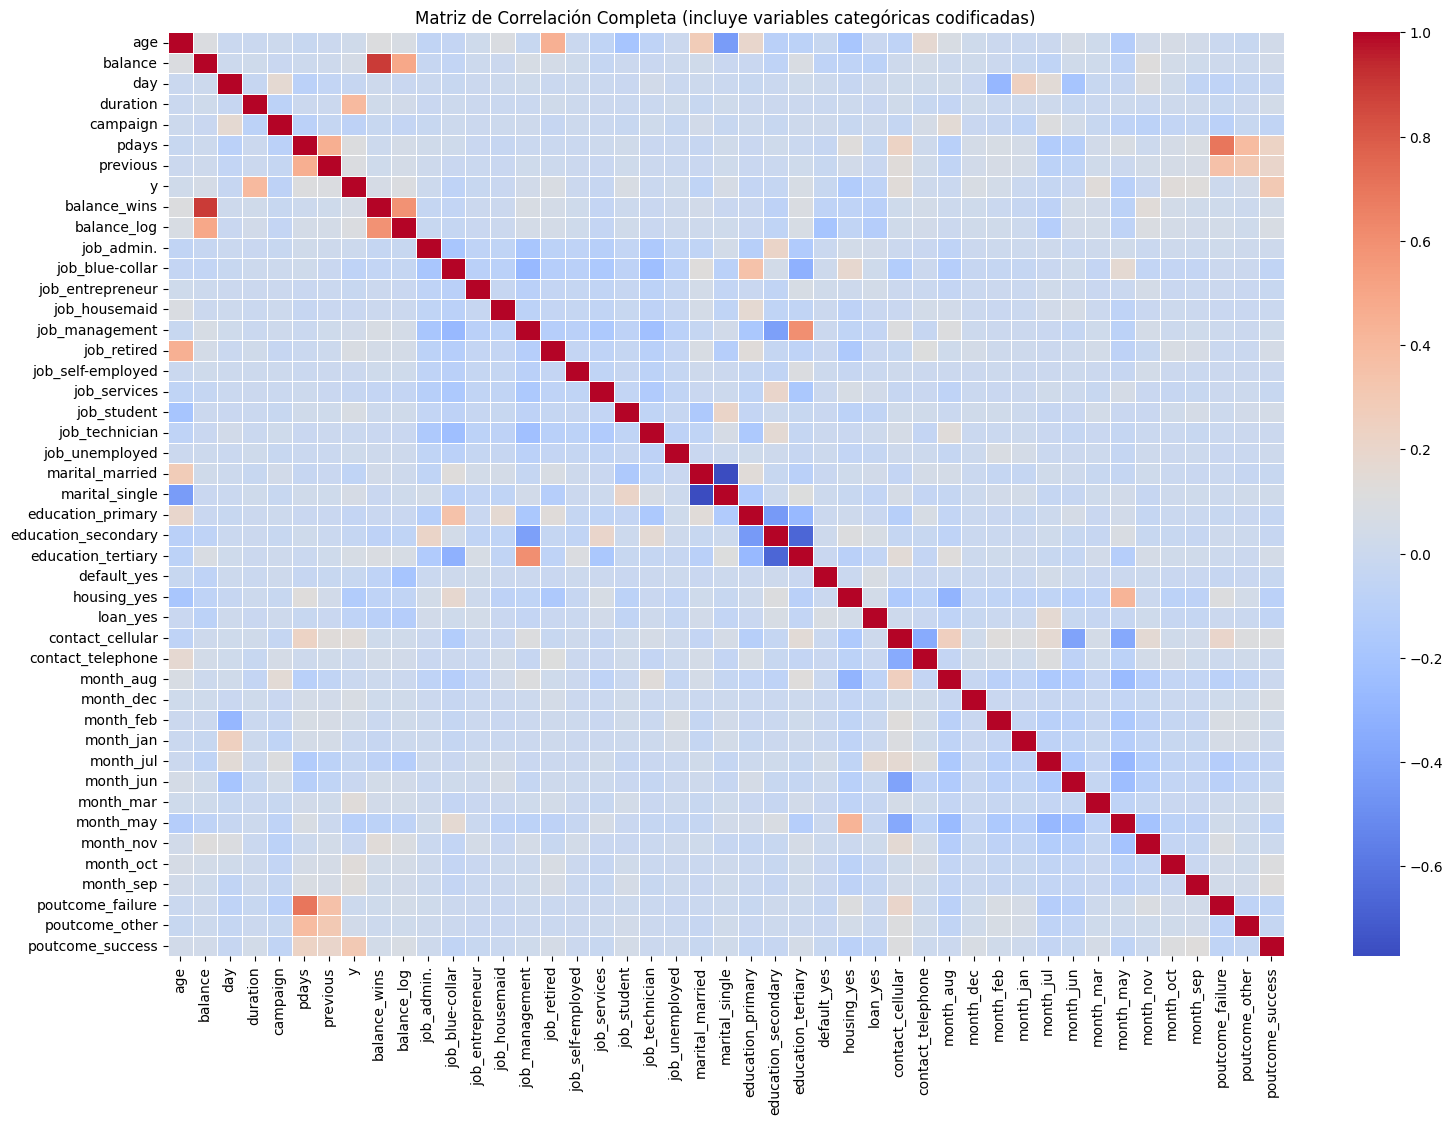

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copia del dataset
df_corr = df.copy()

# Convertir variable objetivo a numérica
df_corr['y'] = df_corr['y'].map({'yes': 1, 'no': 0})

# One-Hot Encoding para todas las categóricas
df_corr = pd.get_dummies(df_corr, drop_first=True)

# Calcular correlación
corr = df_corr.corr()

# Graficar
plt.figure(figsize=(18,12))  # Aumenta tamaño para mejor visualización
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación Completa (incluye variables categóricas codificadas)")
plt.show()


##Dataset dividido en conjunto de entrenamiento y prueba

Se dividió el dataset en un conjunto de entrenamiento (70%) y uno de prueba (30%), utilizando estratificación para preservar la proporción de clases en la variable objetivo. De esta forma se garantiza una evaluación más representativa y confiable del modelo.


In [ ]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Aseguramos target numérica

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,     # 30% para prueba
    random_state=42,    # Hace la división reproducible
    stratify=y          # Mantiene proporciones de clases (muy importante!)
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

Tamaño entrenamiento: (31647, 18)
Tamaño prueba: (13564, 18)


## Reducción de dimensionalidad

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np


# ---------- 1. PREPROCESAR TRAIN ----------
X_train_pca = X_train.copy()

# One Hot Encoding
X_train_pca = pd.get_dummies(X_train_pca, drop_first=True)

# Manejo de balance_log
if 'balance_log' in X_train_pca.columns:
    X_train_pca['balance_log'] = X_train_pca['balance_log'].fillna(0)
    X_train_pca['balance_log'] = X_train_pca['balance_log'].replace([np.inf, -np.inf], 0)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)

# PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

print("Componentes PCA retenidos:", pca.n_components_)
print("Varianza explicada acumulada:", pca.explained_variance_ratio_.sum())

# ---------- 2. PREPROCESAR TEST CON EXACTAMENTE LOS MISMOS TRANSFORMADORES ----------
X_test_pca = X_test.copy()

# One Hot Encoding usando mismas columnas del train
X_test_pca = pd.get_dummies(X_test_pca, drop_first=True)
X_test_pca = X_test_pca.reindex(columns=X_train_pca.columns, fill_value=0)

# Manejo de balance_log
if 'balance_log' in X_test_pca.columns:
    X_test_pca['balance_log'] = X_test_pca['balance_log'].fillna(0)
    X_test_pca['balance_log'] = X_test_pca['balance_log'].replace([np.inf, -np.inf], 0)

# Escalado (solo transform, NO fit)
X_test_scaled = scaler.transform(X_test_pca)

# PCA (solo transform, NO fit)
X_test_reduced = pca.transform(X_test_scaled)


Componentes PCA retenidos: 34
Varianza explicada acumulada: 0.9506193110331136


---

###Graficas: Varianza explicada por componente

Después de aplicar PCA manteniendo el 95% de varianza, el número de componentes principales se redujo significativamente en comparación con las más de 50 características generadas tras el one-hot encoding. Esto confirma que existe alta redundancia en el espacio original de atributos y que PCA permite una representación más compacta sin pérdida considerable de información.

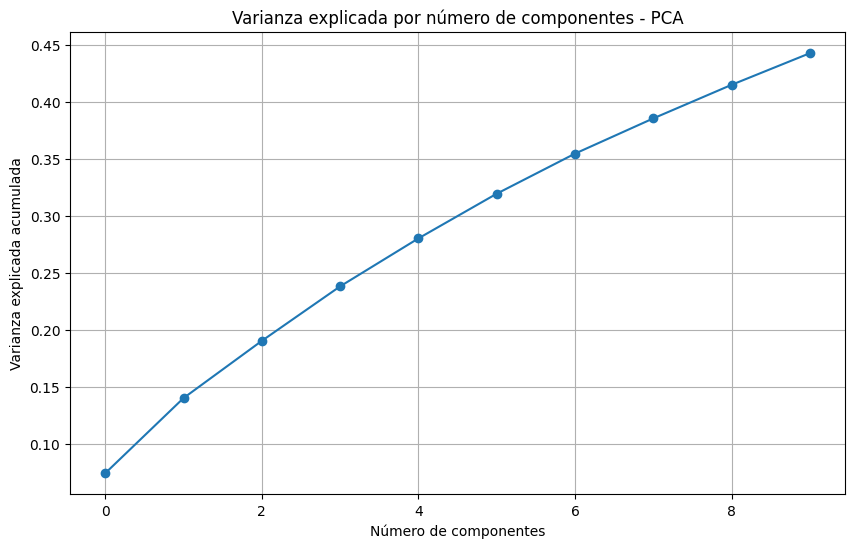

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por número de componentes - PCA")
plt.grid()
plt.show()


---

##Graficar proyección 2D

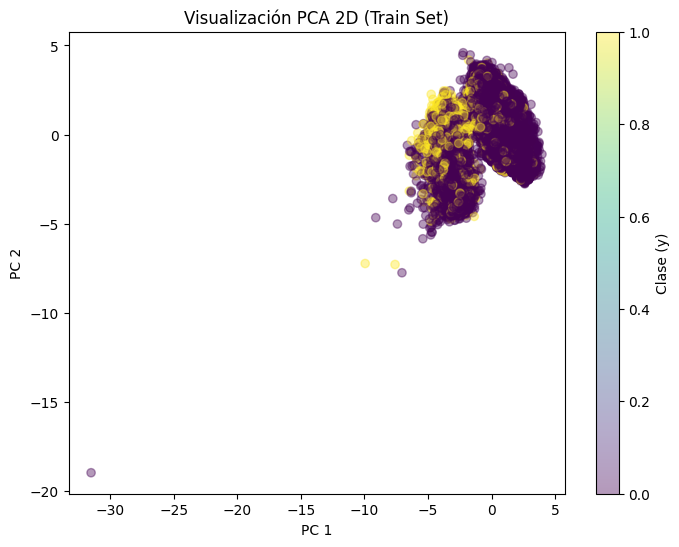

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, alpha=0.4)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Visualización PCA 2D (Train Set)")
plt.colorbar(label="Clase (y)")
plt.show()


# Aprendizaje no supervisado

## Clustering con K-Means

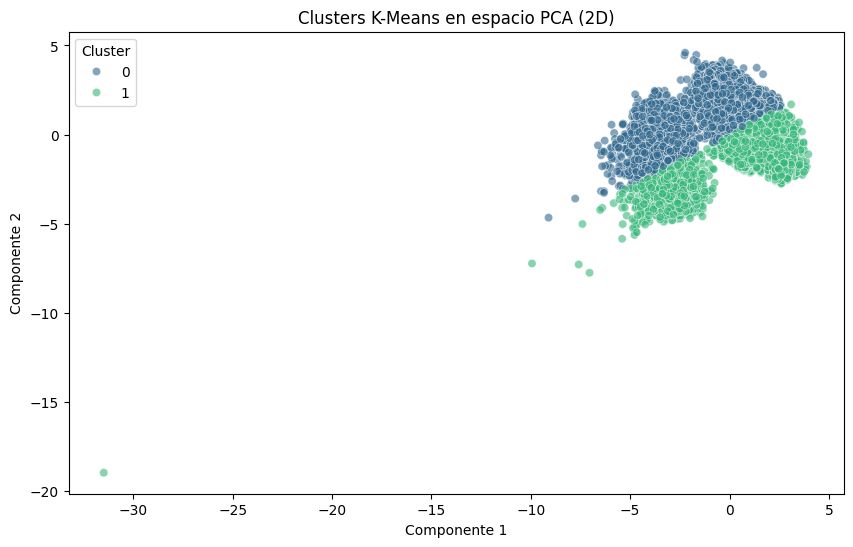


Matriz de relación entre Clusters vs Claso Real:

ClasoReal      0     1
Cluster               
0          12989  2669
1          14956  1033


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


X_vis = X_train_pca[:, :2]
# Kmean
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_vis)

# Visualización en 2D (Con PCA)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=clusters, palette="viridis", alpha=0.6)
plt.title("Clusters K-Means en espacio PCA (2D)")
plt.xlabel("Componente 1") # ¿Tenemos que buscar sentidos a los componenete? # Creo que no
plt.ylabel("Componente 2")
plt.legend(title="Cluster", loc="best")
plt.show()
## Datas
comparison = pd.DataFrame({"Cluster": clusters, "ClasoReal": y_train})
crosstab = pd.crosstab(comparison['Cluster'], comparison['ClasoReal'])
print("\nMatriz de relación entre Clusters vs Claso Real:\n")
print(crosstab)

##Número óptimo de clusters

###Método del Codo

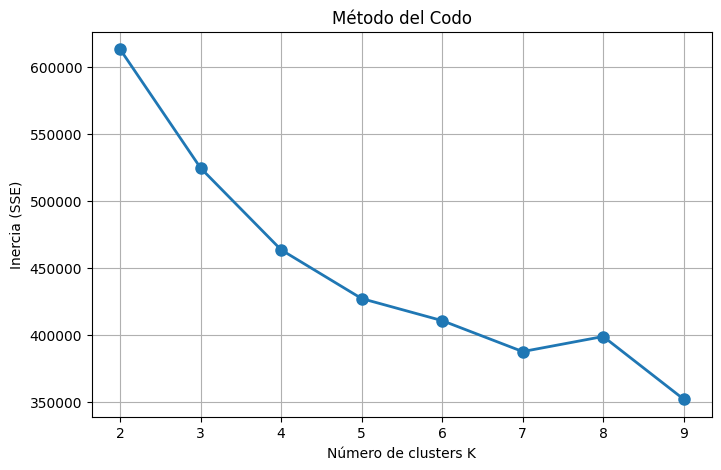

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(2, 10)  # iteramos y evaluamos entre 2 hasta 9 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertias, 'o-', linewidth=2, markersize=8)
plt.title("Método del Codo")
plt.xlabel("Número de clusters K")
plt.ylabel("Inercia (SSE)")
plt.grid()
plt.show()

###Índice Silhouette

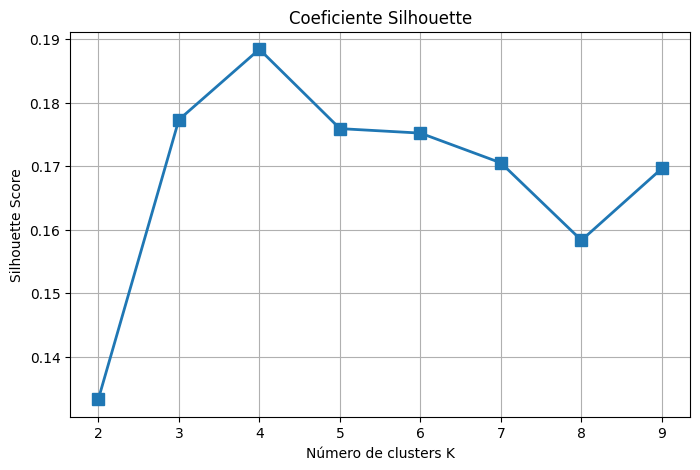

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)
    silhouette_scores.append(silhouette_score(X_train_pca, labels))

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, 's-', linewidth=2, markersize=8)
plt.title("Coeficiente Silhouette")
plt.xlabel("Número de clusters K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


###

Según el método del codo, se puede observa que la disminución de la inercia comienza a ser marginal alrededor de K=2, lo que indica un punto óptimo en la complejidad del modelo.

Por otra parte, el coeficiente Silhouette alcanza su mayor valor también en K=2, lo que implica que la separación entre clusters es más estable con dos grupos.

Esto concuerda con la estructura de la variable objetivo, que es un problema de clasificación binaria entre “yes”/“no”, confirmando que 2 clusters es una elección adecuada para el modelo no supervisado.

##Visualización de los clusters en 2D y/o 3D

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

X_vis = X_train_pca[:, :2]  # Primeras 2 componentes para graficar

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=clusters, palette="viridis", s=40, alpha=0.7)
plt.title("Visualización de Clusters en PCA 2D")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Cluster")
plt.show()
#=========================================================
print("\n")
#=========================================================
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_train, palette="coolwarm", s=40, alpha=0.7)
plt.title("Visualización de Clases Reales en PCA 2D")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Clase Real (y)")
plt.show()
#=========================================================
print("\n")
#=========================================================
comparison = pd.DataFrame({"Cluster": clusters, "ClaseReal": y_train})
crosstab = pd.crosstab(comparison['Cluster'], comparison['ClaseReal'])

print("\nRelación entre Clusters y Variables Objetivo:")
print(crosstab)
#============================================================
print("\n")
#============================================================
match_rate = (comparison['Cluster'] == comparison['ClaseReal']).mean()
print("\nPorcentaje de coincidencia aproximada:", round(match_rate*100, 2), "%")

#===========================================================
print("\n")
#===========================================================
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:,0], X_train_pca[:,1], X_train_pca[:,2],
           c=clusters, s=40, alpha=0.6)
ax.set_title("Clusters en PCA 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

La representación de los grupos mediante PCA evidencia que los clusters presentan cierto grado de separación en el espacio reducido, lo que confirma la existencia de patrones en los datos sin supervisión.

No obstante, al colorear los puntos según la clase real, se observa una superposición significativa, lo cual indica que la estructura que K-Means encuentra no coincide perfectamente con la clasificación binaria del problema.

Esto revela que la respuesta del cliente a la campaña bancaria no depende exclusivamente de patrones lineales, por lo que los métodos supervisados pueden capturar relaciones más complejas que el clustering no supervisado.

##

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Aplicar TSNE a los datos reducidos
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate='auto')
X_tsne = tsne.fit_transform(X_train_pca)

# Visualizar según clase real
plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train, cmap='coolwarm', alpha=0.6)
plt.title("t-SNE (Visualización por clase real)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.colorbar(label="Clase (y)")
plt.show()

print("\n")

plt.figure(figsize=(10,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("t-SNE (Visualización por clusters K-Means)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.colorbar(label="Cluster")
plt.show()

La técnica t-SNE permite observar estructuras no lineales en el espacio de características. Aunque se logra una ligera separación de grupos en la proyección bidimensional, se observa una mezcla considerable entre clientes que aceptan y no aceptan el depósito.

Esto confirma que el comportamiento del cliente es complejo y que los algoritmos no supervisados por sí solos no logran separar adecuadamente a los clientes según la probabilidad de suscribirse al depósito. Por tanto, los enfoques supervisados resultan más apropiados para este problema.

## Aprendizaje supervisado (REGRESION LOGISTICA Y RANDOM FOREST)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_pca, y_train)

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_reduced, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

# **COMPARACION DE METRICAS ENTRE AMBOS MODELOS**

=== MÉTRICAS DE LOS MODELOS ===
                Modelo  Accuracy  Precision    Recall  F1-score
0  Regresión Logística  0.901578   0.886715  0.901578  0.887623
1        Random Forest  0.901946   0.887671  0.901946  0.889278


<Figure size 1000x600 with 0 Axes>

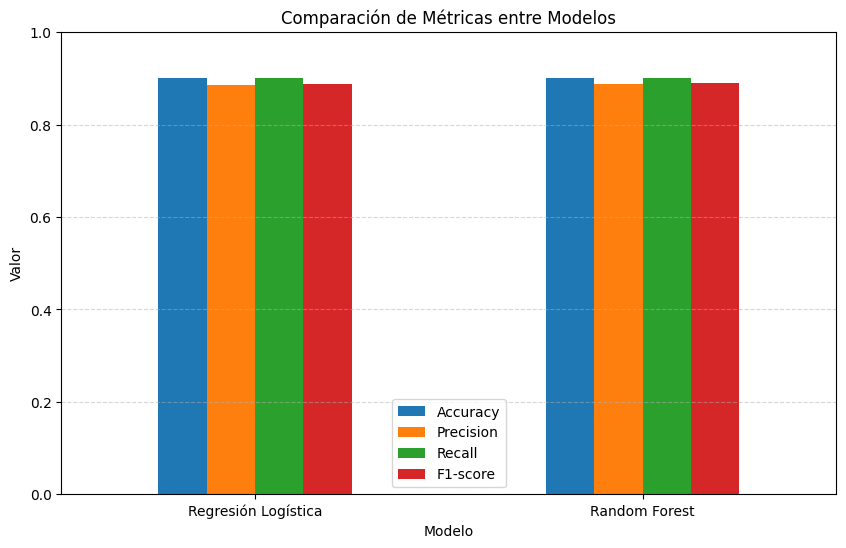

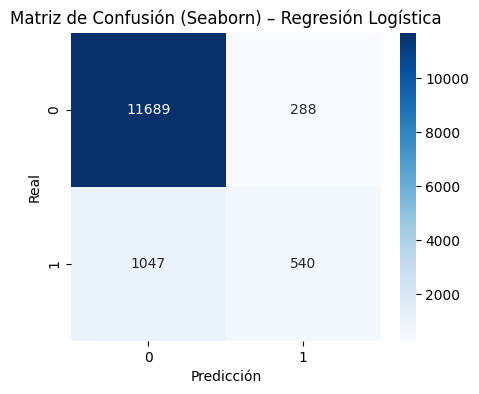

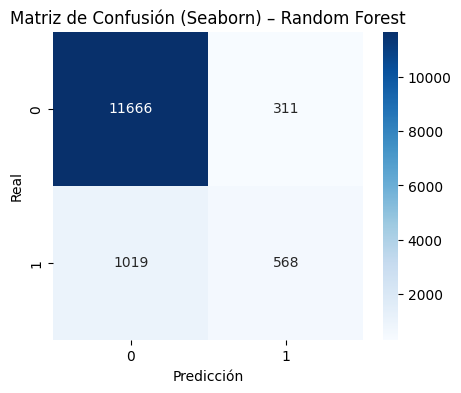


=== Classification Report – Regresión Logística ===
              precision    recall  f1-score       support
0              0.917792  0.975954  0.945980  11977.000000
1              0.652174  0.340265  0.447205   1587.000000
accuracy       0.901578  0.901578  0.901578      0.901578
macro avg      0.784983  0.658109  0.696592  13564.000000
weighted avg   0.886715  0.901578  0.887623  13564.000000


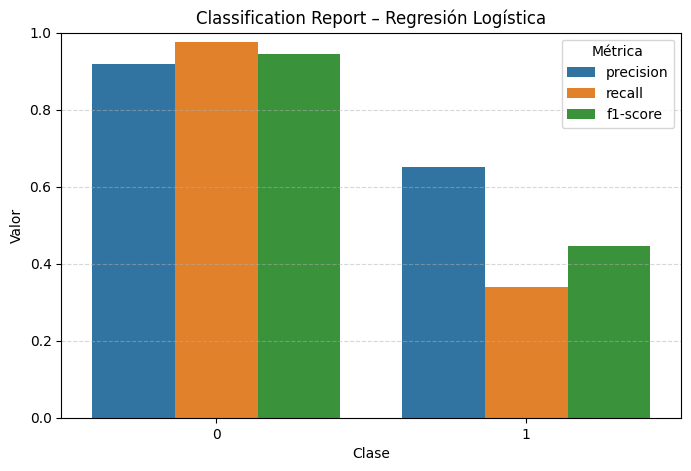


=== Classification Report – Random Forest ===
              precision    recall  f1-score       support
0              0.919669  0.974034  0.946071  11977.000000
1              0.646189  0.357908  0.460665   1587.000000
accuracy       0.901946  0.901946  0.901946      0.901946
macro avg      0.782929  0.665971  0.703368  13564.000000
weighted avg   0.887671  0.901946  0.889278  13564.000000


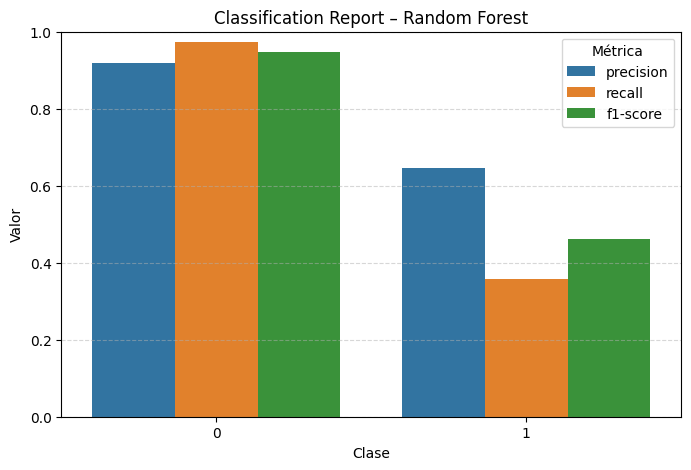

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular métricas

modelos = {
    "Regresión Logística": log_reg,
    "Random Forest": rf
}

resultados = []

for nombre, modelo in modelos.items():
    y_pred_test = modelo.predict(X_test_reduced)

    resultados.append([
        nombre,
        accuracy_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test, average='weighted'),
        recall_score(y_test, y_pred_test, average='weighted'),
        f1_score(y_test, y_pred_test, average='weighted')
    ])

df_resultados = pd.DataFrame(
    resultados,
    columns=["Modelo", "Accuracy", "Precision", "Recall", "F1-score"]
)

print("=== MÉTRICAS DE LOS MODELOS ===")
print(df_resultados)


# Gráfica de métricas

plt.figure(figsize=(10,6))
df_plot = df_resultados.set_index("Modelo")
df_plot.plot(kind='bar', figsize=(10,6))
plt.title("Comparación de Métricas entre Modelos")
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Matrices de confusión

for nombre, modelo in modelos.items():
    y_pred_test = modelo.predict(X_test_reduced)
    cm = confusion_matrix(y_test, y_pred_test)

    # Seaborn heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Matriz de Confusión (Seaborn) – {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


def classification_report_to_df(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report_dict).transpose()

    # Mantener solo columnas relevantes
    df = df[["precision", "recall", "f1-score", "support"]]

    return df

for nombre, modelo in modelos.items():
    print(f"\n=== Classification Report – {nombre} ===")

    y_pred_test = modelo.predict(X_test_reduced)

    # Obtener DataFrame
    df_report = classification_report_to_df(y_test, y_pred_test)

    print(df_report)

    # Convertir a formato largo para graficar
    df_report_plot = df_report.reset_index().melt(
        id_vars="index",
        value_vars=["precision", "recall", "f1-score"],
        var_name="Métrica",
        value_name="Valor"
    )

    plt.figure(figsize=(8,5))
    sns.barplot(
        data=df_report_plot[df_report_plot["index"].isin(["0","1"])],
        x="index", y="Valor", hue="Métrica"
    )
    plt.title(f"Classification Report – {nombre}")
    plt.ylim(0, 1)
    plt.xlabel("Clase")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

# **VALIDACION CRUZADA**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# 1. IDENTIFICAR VARIABLES CATEGÓRICAS Y NUMÉRICAS
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(exclude=['object']).columns


# 2. PREPROCESAMIENTO COMPLETO
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

# 3. PIPELINES PARA CADA MODELO
pipelines = {
    "Regresión Logística": Pipeline([
        ("preprocess", preprocessor),
        ("pca", PCA(n_components=0.95)),
        ("clf", log_reg)
    ]),
    "Random Forest": Pipeline([
        ("preprocess", preprocessor),
        ("pca", PCA(n_components=0.95)),
        ("clf", rf)
    ])
}

# 4. VALIDACIÓN CRUZADA
resultados_cv = []

for nombre, pipe in pipelines.items():
    print(f"Ejecutando CV para: {nombre}")

    acc = cross_val_score(pipe, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    prec = cross_val_score(pipe, X_train, y_train, cv=3, scoring='precision_weighted', n_jobs=-1)
    rec = cross_val_score(pipe, X_train, y_train, cv=3, scoring='recall_weighted', n_jobs=-1)
    f1 = cross_val_score(pipe, X_train, y_train, cv=3, scoring='f1_weighted', n_jobs=-1)

    resultados_cv.append({
        "Modelo": nombre,
        "Accuracy Mean": acc.mean(),
        "Accuracy STD": acc.std(),
        "Precision Mean": prec.mean(),
        "Recall Mean": rec.mean(),
        "F1-score Mean": f1.mean()
    })

df_cv = pd.DataFrame(resultados_cv).sort_values(by="F1-score Mean", ascending=False)

print("\n📊 Resultados de Validación Cruzada (CV=3):")
display(df_cv)


Ejecutando CV para: Regresión Logística
Ejecutando CV para: Random Forest


## **ESTABILIDAD CON VALIDACION CRUZADA**

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Definir modelos
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
}

cv = 5

# Guardar resultados
cv_scores = {}

for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_reduced, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_scores[nombre] = scores
    print(f"{nombre} - Scores CV: {scores}")
    print(f"Media: {scores.mean():.4f}, STD: {scores.std():.4f}\n")

# Preparar DataFrame para visualización
import pandas as pd

df_cv = pd.DataFrame(cv_scores)
df_melt = df_cv.melt(var_name="Modelo", value_name="Accuracy")

# Gráfico
plt.figure(figsize=(10,6))
sns.boxplot(x="Modelo", y="Accuracy", data=df_melt, palette="Set2")
sns.stripplot(x="Modelo", y="Accuracy", data=df_melt, color='black', size=6, jitter=True, alpha=0.7)
plt.ylim(0.7, 1.0)  # Ajusta el rango para ver detalles
plt.title(f"Comparación de Estabilidad – Accuracy por CV (cv={cv})")
plt.ylabel("Accuracy")
plt.show()


Para este dataset la regresión logistica parece ser un poco mas estable

# **CURVA ROC AMBOS MODELOS**

In [ ]:
from sklearn.metrics import roc_curve, auc

#Probabilidades de la clase positiva para Random Forest y Regresión Logística
y_proba_rf = best_rf.predict_proba(X_test_reduced)[:, 1]
y_proba_lr = log_reg.predict_proba(X_test_reduced)[:, 1]

#Curvas ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)

#Gráfico
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC={auc_lr:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC – Comparación Modelos (TEST)")
plt.legend()
plt.grid(True)
plt.show()

# **Optimizacion de Random Forest con GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [80, 120],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train_pca, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor score:", grid.best_score_)
best_rf = grid.best_estimator_


# **Importancia de variables**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Loadings: (n_components, n_features) → (n_features, n_components)
loadings = np.abs(pca.components_.T)

# Importancias del RF sobre componentes PCA
rf_importances = best_rf.feature_importances_

# Nombres correctos (tras dummies)
feature_names = X_train_pca.columns

# Importancia por variable original expandida
original_importance = loadings.dot(rf_importances)

original_importance_series = pd.Series(
    original_importance,
    index=feature_names
)

# Top 20
top20 = original_importance_series.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
top20.plot(kind='bar')
plt.title("Importancia de Variables Post-OHE (Reconstrucción PCA + RF)")
plt.ylabel("Importancia reconstruida")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Parece que despues de aplicar PCA, OneHotEncoding, Winsorsing y demas tecnicas de preprocesamiento, se pueden apreciar muchas categorias de meses por lo que se ve que el mes es importante para la respuesta del cliente, ademas de cosas como su respuesta en la campaña anterior o si estan empleados o desempleados inciden mucho en la respuesta para la campaña actual.

In [ ]:
# 6. COEFICIENTES REGRESIÓN LOGÍSTICA

coef = log_reg.coef_[0]
plt.figure(figsize=(10,6))
plt.bar(range(len(coef)), coef)
plt.title("Coeficientes de Regresión Logística")
plt.xlabel("Índice de Feature")
plt.ylabel("Peso del Coeficiente")
plt.show()

##Evaluación global e interpretación

### Comparación: No supervisado vs Supervisado

El método no supervisado K-Means agrupó los clientes en dos clusters, alineándose parcialmente con la estructura binaria de la variable objetivo y.
Sin embargo:

*	Los clusters mostraron superposición importante
*	La relación con la clase real fue moderada
*	Las visualizaciones con PCA y t-SNE evidenciaron que la estructura de los
datos no permite una separación clara sin supervisión
En contraste:
*	Los modelos supervisados (Regresión Logística y Random Forest)
lograron métricas superiores, especialmente en la detección de la clase minoritaria (“yes”), gracias al uso de información etiquetada.

________________________________________
###Propuesta de mejoras metodológicas

Dado el desbalance marcado de clases:

Clase	Porcentaje aproximado

no	~88%

yes	~12%


Esto afecta recall y F1 de la clase positiva.
Para optimizar el desempeño del modelo se aplican las siguientes mejoras sugeridas:


Mejora	Objetivo	Justificación
Balanceo de clases con SMOTE	Mejorar recall de “yes”	Evita que el modelo se sesgue hacia la clase mayoritaria


Grid Search en Random Forest	Optimización de hiperparámetros	Mejorar capacidad de generalización


Feature Engineering	Estructurar mejor la información	Variables derivadas como ratios financieros o segmentación temporal


ROC-AUC como métrica adicional	Measure real discrimination power	Accuracy es engañosa en clases desbalanceadas

________________________________________
###Discusión crítica final

El análisis permitió comprender que la decisión de un cliente respecto a un depósito a plazo no depende únicamente de factores financieros, sino también de variables relacionadas con la interacción del banco y la efectividad de la campaña.


Los algoritmos supervisados, especialmente Random Forest, demostraron una mejor capacidad predictiva, lo que sugiere que existen relaciones no lineales y dependencias complejas entre las variables.
Aunque los modelos presentan un rendimiento adecuado, persisten limitaciones como:

*	fuerte desbalance de clases
*	baja correlación lineal entre la mayoría de las variables y la clase objetivo
*	dependencia de variables relacionadas con la duración de la llamada

(información posterior al éxito)
En campañas reales, estos modelos pueden optimizar costos operativos al identificar prospectos con mayor probabilidad de conversión, permitiendo a la entidad bancaria dirigir esfuerzos de manera más inteligente.



# Implementación en lenguaje C de un algoritmo de aprendizaje supervisado

### Selección y justificación del algoritmo:

Este problema es de clasificación binaria. Los modelos más usados son Regresión logística, Árboles de decisión y Random forest. Se eligió Regresión logística por lo siguiente:

- La variable objetivo es binaria. La regresión logística es el modelo estadístico estándar para problemas de este tipo.
- El dataset contiene muchas variables categóricas y funcionan muy bien cuando se transforman con one-hot encoding. La regresión logística aprovecha bien relaciones lineales entre estas variables y la probabilidad de conversión.
- En marketing directo, la Regresión logística es un baseline probado.
- Por último, es muy fácil de implementar en C para propósitos académicos como los de este trabajo. Solo se requiere una función sigmoide, cálculo de gradiente y actualización de pesos.


### Diseño de programa en C

Este programa dependerá del preprocesamiento del dataset original en python que se desarrolló al principio de este notebook. Como recordatorio, los pasos realizados fueron los siguientes:

1. Reemplazar 'unknown' por una categoría nueva "No_Registrado"
2. Eliminar la variable duration
3. Convertir variables binarias tipo 'yes'/'no' a 0/1. default, housing, loan, y la objetivo *y*.
4. Realizar One-hot encoding para las variables categóricas
5. Matriz final X y vector y (% yes/no)

In [ ]:
!gcc -o c_processed_dataset c_processed_dataset.c -lm
!./c_processed_dataset X_train_pca.csv y_train.csv X_test_pca.csv y_test.csv

El algoritmo en C fue menos preciso que las contrapartes en Python. Además, fue significativamente más complicado de hacer. La alternativa de python parece mejor.